## Masked Autoencoders: Visualization Demo

This is a visualization demo using our pre-trained MAE models. No GPU is needed.

In [1]:
import sys
import os
import requests
import torchaudio
from torchaudio.compliance import kaldi
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
sys.path.append("../")
import modeling_finetune_av
import librosa
import librosa.display

### Define utils

In [2]:
# define the utils
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])
from torchvision.transforms import Grayscale

def prepare_model(chkpt_dir, arch='avit_dim512_patch16_160_a256'):
    # build model
    model = getattr(modeling_finetune_av, arch)()
    #model = modeling_finetune_av.avit_dim512_patch16_160_a256()
    # load model
    checkpoint = torch.load(chkpt_dir, map_location='cpu')
    model.load_state_dict(checkpoint['model'])
    model.eval()
    # add a transform to convert 1 channel grayscale images to 3 channel RGB images
    model.transform = Grayscale(num_output_channels=3)
    return model


In [3]:
def display_fbank(bank, minmin=None, maxmax=None):
    #print(bank.shape, bank.min(), bank.max())
    #plt.figure(figsize=(18, 6))
    plt.figure(figsize=(20, 4))
    plt.imshow(20*bank.T.numpy(), origin='lower', interpolation='nearest', vmax=maxmax, vmin=minmin,  aspect='auto')
    #plt.colorbar()
    #S_db = librosa.amplitude_to_db(np.abs(bank.T.numpy()),ref=np.max)
    #S_db = bank.T.numpy()
    #plt.figure()
    #librosa.display.specshow(10*bank.T.numpy())
    #plt.colorbar()

torch.Size([1, 31498]) 16000
torch.Size([195, 128])


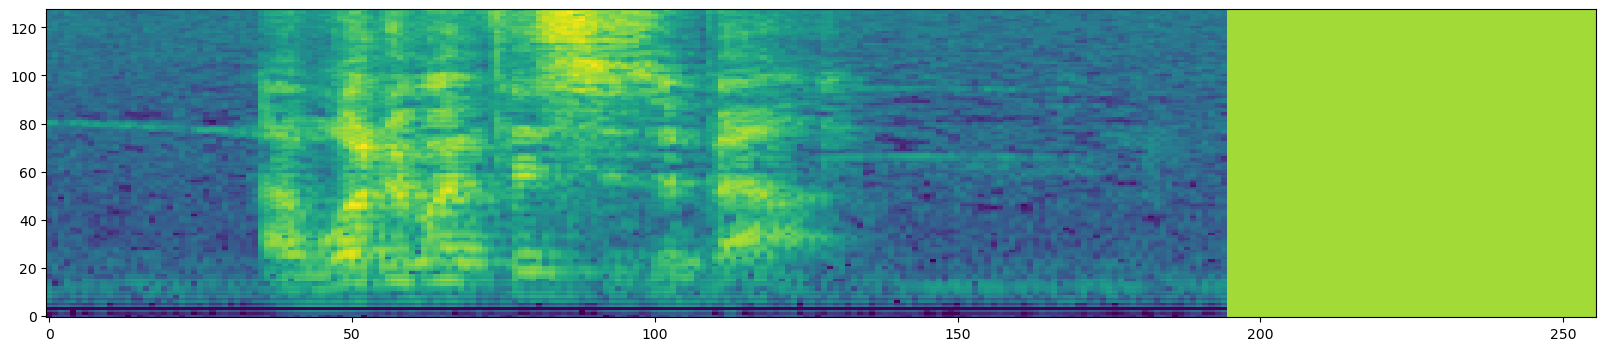

In [4]:
MELBINS=128 # 频率范围
TARGET_LEN=256# 时间长度
def wav2fbank(filename):

    waveform, sr = torchaudio.load(filename)
    waveform = waveform - waveform.mean()
    print(waveform.shape, sr)
    # 498 128  #kald生成的是音频特征图，不是梅尔频谱图
    fbank = kaldi.fbank(waveform, htk_compat=True, sample_frequency=sr, use_energy=False, 
                        window_type='hanning', num_mel_bins=MELBINS, dither=0.0, frame_shift=10)
    # AudioSet: 1024 (16K sr)
    # ESC: 512 (8K sr)
    n_frames = fbank.shape[0]
    print(fbank.shape)
    p = TARGET_LEN - n_frames
    #p = n_frames
    # cut and pad the fbank features
    if p > 0:
        m = torch.nn.ZeroPad2d((0, 0, 0, p))
        fbank = m(fbank)
    elif p < 0:
        fbank = fbank[0:TARGET_LEN, :]
    return fbank
def norm_fbank(fbank):
    norm_mean= -4.2677393
    norm_std= 4.5689974
    fbank = (fbank - norm_mean) / (norm_std * 2)
    return fbank

wav_file = '/home/hao/Project/HiCMAE/AC/Dataset/CREMA-D/AudioWAV/1001_IWW_HAP_XX.wav'

fbank = wav2fbank(wav_file)
#fbank = norm_fbank(fbank)
display_fbank(fbank)


In [5]:
def display_fbank(bank, minmin=None, maxmax=None):
    #print(bank.shape, bank.min(), bank.max())
    #plt.figure(figsize=(18, 6))
    plt.figure(figsize=(20, 4))
    plt.imshow(20*bank.T.numpy(), origin='lower', interpolation='nearest', vmax=maxmax, vmin=minmin,  aspect='auto')
    #plt.colorbar()
    #S_db = librosa.amplitude_to_db(np.abs(bank.T.numpy()),ref=np.max)
    #S_db = bank.T.numpy()
    #plt.figure()
    #librosa.display.specshow(10*bank.T.numpy())
    #plt.colorbar()

torch.Size([1, 36409]) 16000
torch.Size([226, 128])


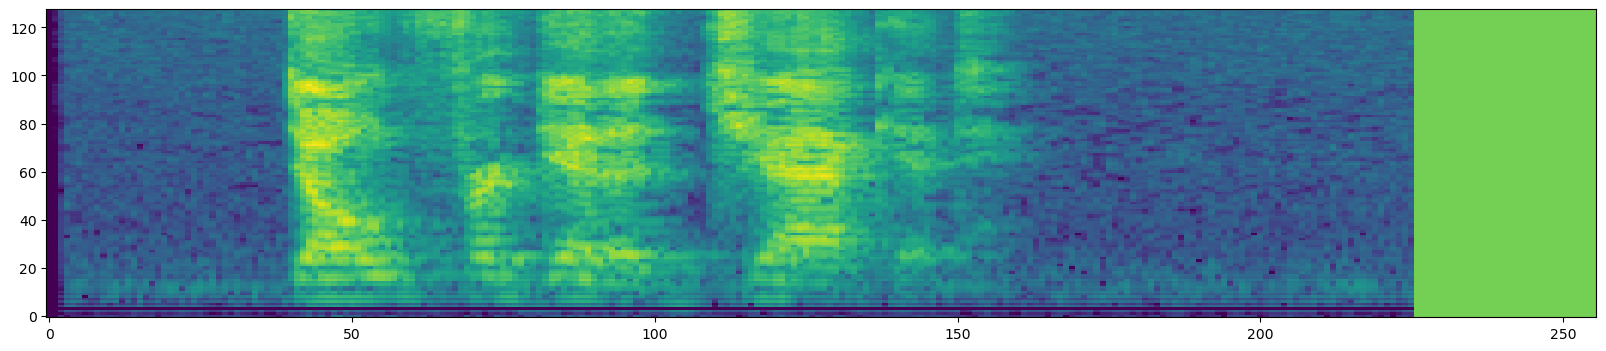

In [6]:
wav_file = '/home/hao/Project/HiCMAE/AC/Dataset/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav'
#wav_file = '/large_experiments/cmd/audioset/balance_wav/1JmYeNQ1jEI.wav'
mp4_file = '/home/hao/Project/HiCMAE/AC/Dataset/CREMA-D/face_aligned/1001_DFA_ANG_XX'
fbank = wav2fbank(wav_file)
fbank = norm_fbank(fbank)
display_fbank(fbank)

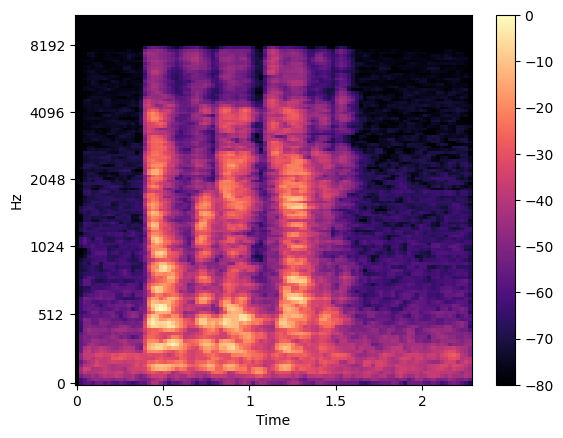

In [7]:
y, sr = librosa.load(wav_file)
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
plt.figure()
librosa.display.specshow(M_db, y_axis='mel', x_axis='time')
plt.colorbar()

In [8]:
#chkpt_dir = '/checkpoint/berniehuang/experiments/53417041/checkpoint-80.pth
chkpt_dir = '/home/hao/Project/HiCMAE/saved/model/pretraining/voxceleb2/audio_visual/hicmae_pretrain_base/checkpoint-99.pth'

model = prepare_model(chkpt_dir, 'avit_dim512_patch16_160_a256')
print('Model loaded.')

RuntimeError: Error(s) in loading state_dict for AudioVisionTransformer:
	Missing key(s) in state_dict: "video_layer_weights", "audio_layer_weights", "encoder.blocks.10.norm1.weight", "encoder.blocks.10.norm1.bias", "encoder.blocks.10.attn.q_bias", "encoder.blocks.10.attn.v_bias", "encoder.blocks.10.attn.qkv.weight", "encoder.blocks.10.attn.proj.weight", "encoder.blocks.10.attn.proj.bias", "encoder.blocks.10.norm2.weight", "encoder.blocks.10.norm2.bias", "encoder.blocks.10.mlp.fc1.weight", "encoder.blocks.10.mlp.fc1.bias", "encoder.blocks.10.mlp.fc2.weight", "encoder.blocks.10.mlp.fc2.bias", "encoder.blocks.11.norm1.weight", "encoder.blocks.11.norm1.bias", "encoder.blocks.11.attn.q_bias", "encoder.blocks.11.attn.v_bias", "encoder.blocks.11.attn.qkv.weight", "encoder.blocks.11.attn.proj.weight", "encoder.blocks.11.attn.proj.bias", "encoder.blocks.11.norm2.weight", "encoder.blocks.11.norm2.bias", "encoder.blocks.11.mlp.fc1.weight", "encoder.blocks.11.mlp.fc1.bias", "encoder.blocks.11.mlp.fc2.weight", "encoder.blocks.11.mlp.fc2.bias", "encoder_audio.blocks.10.norm1.weight", "encoder_audio.blocks.10.norm1.bias", "encoder_audio.blocks.10.attn.q_bias", "encoder_audio.blocks.10.attn.v_bias", "encoder_audio.blocks.10.attn.qkv.weight", "encoder_audio.blocks.10.attn.proj.weight", "encoder_audio.blocks.10.attn.proj.bias", "encoder_audio.blocks.10.norm2.weight", "encoder_audio.blocks.10.norm2.bias", "encoder_audio.blocks.10.mlp.fc1.weight", "encoder_audio.blocks.10.mlp.fc1.bias", "encoder_audio.blocks.10.mlp.fc2.weight", "encoder_audio.blocks.10.mlp.fc2.bias", "encoder_audio.blocks.11.norm1.weight", "encoder_audio.blocks.11.norm1.bias", "encoder_audio.blocks.11.attn.q_bias", "encoder_audio.blocks.11.attn.v_bias", "encoder_audio.blocks.11.attn.qkv.weight", "encoder_audio.blocks.11.attn.proj.weight", "encoder_audio.blocks.11.attn.proj.bias", "encoder_audio.blocks.11.norm2.weight", "encoder_audio.blocks.11.norm2.bias", "encoder_audio.blocks.11.mlp.fc1.weight", "encoder_audio.blocks.11.mlp.fc1.bias", "encoder_audio.blocks.11.mlp.fc2.weight", "encoder_audio.blocks.11.mlp.fc2.bias", "fc_norm.weight", "fc_norm.bias", "head.weight", "head.bias". 
	Unexpected key(s) in state_dict: "mask_token", "mask_token_audio", "decoder.blocks.0.norm1.weight", "decoder.blocks.0.norm1.bias", "decoder.blocks.0.attn.q_bias", "decoder.blocks.0.attn.v_bias", "decoder.blocks.0.attn.qkv.weight", "decoder.blocks.0.attn.proj.weight", "decoder.blocks.0.attn.proj.bias", "decoder.blocks.0.norm2.weight", "decoder.blocks.0.norm2.bias", "decoder.blocks.0.mlp.fc1.weight", "decoder.blocks.0.mlp.fc1.bias", "decoder.blocks.0.mlp.fc2.weight", "decoder.blocks.0.mlp.fc2.bias", "decoder.blocks.1.cross_attn.q_bias", "decoder.blocks.1.cross_attn.v_bias", "decoder.blocks.1.cross_attn.q.weight", "decoder.blocks.1.cross_attn.kv.weight", "decoder.blocks.1.cross_attn.proj.weight", "decoder.blocks.1.cross_attn.proj.bias", "decoder.blocks.1.cross_norm1.weight", "decoder.blocks.1.cross_norm1.bias", "decoder.blocks.1.cross_norm2.weight", "decoder.blocks.1.cross_norm2.bias", "decoder.blocks.1.norm1.weight", "decoder.blocks.1.norm1.bias", "decoder.blocks.1.attn.q_bias", "decoder.blocks.1.attn.v_bias", "decoder.blocks.1.attn.qkv.weight", "decoder.blocks.1.attn.proj.weight", "decoder.blocks.1.attn.proj.bias", "decoder.blocks.1.norm2.weight", "decoder.blocks.1.norm2.bias", "decoder.blocks.1.mlp.fc1.weight", "decoder.blocks.1.mlp.fc1.bias", "decoder.blocks.1.mlp.fc2.weight", "decoder.blocks.1.mlp.fc2.bias", "decoder.blocks.2.cross_attn.q_bias", "decoder.blocks.2.cross_attn.v_bias", "decoder.blocks.2.cross_attn.q.weight", "decoder.blocks.2.cross_attn.kv.weight", "decoder.blocks.2.cross_attn.proj.weight", "decoder.blocks.2.cross_attn.proj.bias", "decoder.blocks.2.cross_norm1.weight", "decoder.blocks.2.cross_norm1.bias", "decoder.blocks.2.cross_norm2.weight", "decoder.blocks.2.cross_norm2.bias", "decoder.blocks.2.norm1.weight", "decoder.blocks.2.norm1.bias", "decoder.blocks.2.attn.q_bias", "decoder.blocks.2.attn.v_bias", "decoder.blocks.2.attn.qkv.weight", "decoder.blocks.2.attn.proj.weight", "decoder.blocks.2.attn.proj.bias", "decoder.blocks.2.norm2.weight", "decoder.blocks.2.norm2.bias", "decoder.blocks.2.mlp.fc1.weight", "decoder.blocks.2.mlp.fc1.bias", "decoder.blocks.2.mlp.fc2.weight", "decoder.blocks.2.mlp.fc2.bias", "decoder.blocks.3.cross_attn.q_bias", "decoder.blocks.3.cross_attn.v_bias", "decoder.blocks.3.cross_attn.q.weight", "decoder.blocks.3.cross_attn.kv.weight", "decoder.blocks.3.cross_attn.proj.weight", "decoder.blocks.3.cross_attn.proj.bias", "decoder.blocks.3.cross_norm1.weight", "decoder.blocks.3.cross_norm1.bias", "decoder.blocks.3.cross_norm2.weight", "decoder.blocks.3.cross_norm2.bias", "decoder.blocks.3.norm1.weight", "decoder.blocks.3.norm1.bias", "decoder.blocks.3.attn.q_bias", "decoder.blocks.3.attn.v_bias", "decoder.blocks.3.attn.qkv.weight", "decoder.blocks.3.attn.proj.weight", "decoder.blocks.3.attn.proj.bias", "decoder.blocks.3.norm2.weight", "decoder.blocks.3.norm2.bias", "decoder.blocks.3.mlp.fc1.weight", "decoder.blocks.3.mlp.fc1.bias", "decoder.blocks.3.mlp.fc2.weight", "decoder.blocks.3.mlp.fc2.bias", "decoder.norm.weight", "decoder.norm.bias", "decoder.head.weight", "decoder.head.bias", "encoder_to_decoder.weight", "decoder_audio.blocks.0.norm1.weight", "decoder_audio.blocks.0.norm1.bias", "decoder_audio.blocks.0.attn.q_bias", "decoder_audio.blocks.0.attn.v_bias", "decoder_audio.blocks.0.attn.qkv.weight", "decoder_audio.blocks.0.attn.proj.weight", "decoder_audio.blocks.0.attn.proj.bias", "decoder_audio.blocks.0.norm2.weight", "decoder_audio.blocks.0.norm2.bias", "decoder_audio.blocks.0.mlp.fc1.weight", "decoder_audio.blocks.0.mlp.fc1.bias", "decoder_audio.blocks.0.mlp.fc2.weight", "decoder_audio.blocks.0.mlp.fc2.bias", "decoder_audio.blocks.1.cross_attn.q_bias", "decoder_audio.blocks.1.cross_attn.v_bias", "decoder_audio.blocks.1.cross_attn.q.weight", "decoder_audio.blocks.1.cross_attn.kv.weight", "decoder_audio.blocks.1.cross_attn.proj.weight", "decoder_audio.blocks.1.cross_attn.proj.bias", "decoder_audio.blocks.1.cross_norm1.weight", "decoder_audio.blocks.1.cross_norm1.bias", "decoder_audio.blocks.1.cross_norm2.weight", "decoder_audio.blocks.1.cross_norm2.bias", "decoder_audio.blocks.1.norm1.weight", "decoder_audio.blocks.1.norm1.bias", "decoder_audio.blocks.1.attn.q_bias", "decoder_audio.blocks.1.attn.v_bias", "decoder_audio.blocks.1.attn.qkv.weight", "decoder_audio.blocks.1.attn.proj.weight", "decoder_audio.blocks.1.attn.proj.bias", "decoder_audio.blocks.1.norm2.weight", "decoder_audio.blocks.1.norm2.bias", "decoder_audio.blocks.1.mlp.fc1.weight", "decoder_audio.blocks.1.mlp.fc1.bias", "decoder_audio.blocks.1.mlp.fc2.weight", "decoder_audio.blocks.1.mlp.fc2.bias", "decoder_audio.blocks.2.cross_attn.q_bias", "decoder_audio.blocks.2.cross_attn.v_bias", "decoder_audio.blocks.2.cross_attn.q.weight", "decoder_audio.blocks.2.cross_attn.kv.weight", "decoder_audio.blocks.2.cross_attn.proj.weight", "decoder_audio.blocks.2.cross_attn.proj.bias", "decoder_audio.blocks.2.cross_norm1.weight", "decoder_audio.blocks.2.cross_norm1.bias", "decoder_audio.blocks.2.cross_norm2.weight", "decoder_audio.blocks.2.cross_norm2.bias", "decoder_audio.blocks.2.norm1.weight", "decoder_audio.blocks.2.norm1.bias", "decoder_audio.blocks.2.attn.q_bias", "decoder_audio.blocks.2.attn.v_bias", "decoder_audio.blocks.2.attn.qkv.weight", "decoder_audio.blocks.2.attn.proj.weight", "decoder_audio.blocks.2.attn.proj.bias", "decoder_audio.blocks.2.norm2.weight", "decoder_audio.blocks.2.norm2.bias", "decoder_audio.blocks.2.mlp.fc1.weight", "decoder_audio.blocks.2.mlp.fc1.bias", "decoder_audio.blocks.2.mlp.fc2.weight", "decoder_audio.blocks.2.mlp.fc2.bias", "decoder_audio.blocks.3.cross_attn.q_bias", "decoder_audio.blocks.3.cross_attn.v_bias", "decoder_audio.blocks.3.cross_attn.q.weight", "decoder_audio.blocks.3.cross_attn.kv.weight", "decoder_audio.blocks.3.cross_attn.proj.weight", "decoder_audio.blocks.3.cross_attn.proj.bias", "decoder_audio.blocks.3.cross_norm1.weight", "decoder_audio.blocks.3.cross_norm1.bias", "decoder_audio.blocks.3.cross_norm2.weight", "decoder_audio.blocks.3.cross_norm2.bias", "decoder_audio.blocks.3.norm1.weight", "decoder_audio.blocks.3.norm1.bias", "decoder_audio.blocks.3.attn.q_bias", "decoder_audio.blocks.3.attn.v_bias", "decoder_audio.blocks.3.attn.qkv.weight", "decoder_audio.blocks.3.attn.proj.weight", "decoder_audio.blocks.3.attn.proj.bias", "decoder_audio.blocks.3.norm2.weight", "decoder_audio.blocks.3.norm2.bias", "decoder_audio.blocks.3.mlp.fc1.weight", "decoder_audio.blocks.3.mlp.fc1.bias", "decoder_audio.blocks.3.mlp.fc2.weight", "decoder_audio.blocks.3.mlp.fc2.bias", "decoder_audio.norm.weight", "decoder_audio.norm.bias", "decoder_audio.head.weight", "decoder_audio.head.bias", "encoder_to_decoder_audio.weight". 

In [8]:
import modeling_finetune_av

model = modeling_finetune_av.avit_dim512_patch16_160_a256()

In [ ]:
x = torch.tensor(fbank)
print(x.shape)
# make it a batch-like
x = x.unsqueeze(dim=0)
x = x.unsqueeze(dim=0)
print(x.shape)
#x = torch.einsum('nhwc->nchw', x)

torch.Size([1024, 128])
torch.Size([1, 1, 1024, 128])


/tmp/ipykernel_190877/2277072120.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(fbank)


In [ ]:
# run MAE
loss, y, mask,_ = model(mp4_file, x.float())
print('y_shape:',y.shape, mask.shape)
y = model.unpatchify(y)
y = torch.einsum('nchw->nhwc', y).detach().cpu()



AttributeError: 'str' object has no attribute 'shape'

In [ ]:
# visualize the mask
mask = mask.detach()
#mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *1)
print(mask.shape)
mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
mask = torch.einsum('nchw->nhwc', mask).detach().cpu()

x = torch.einsum('nchw->nhwc', x)

# masked image
im_masked = x * (1 - mask) 

# MAE reconstruction pasted with visible patches
im_paste = x * (1 - mask) + y * mask



#x[0]
#im_masked[0]
#y[0]
#im_paste[0], "reconstruction + visible")


torch.Size([1, 512, 256])


In [ ]:
minmin = np.min([x[0].min(), im_masked[0].min(), y[0].min(), im_paste[0].min()])
maxmax = np.max([x[0].max(), im_masked[0].max(), y[0].max(), im_paste[0].max()])
minmin *= 10
maxmax *= 1
minmin=-10
maxmax=10
start=300
end=900
print(minmin,maxmax)

-10 10


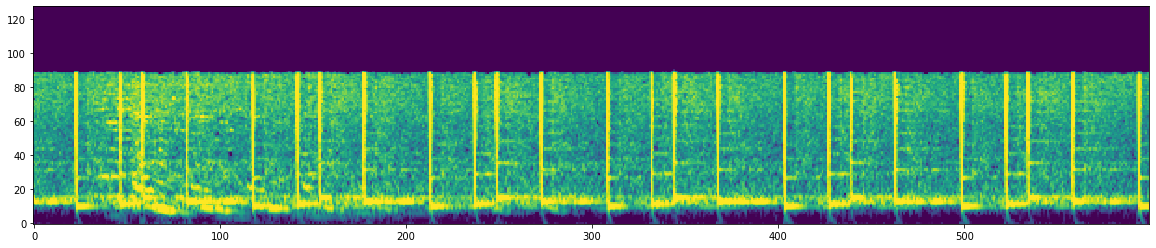

In [ ]:
display_fbank(x[0][start:end].squeeze(), minmin=minmin, maxmax=maxmax)

In [ ]:
im_masked2 = im_masked + (mask)*-10

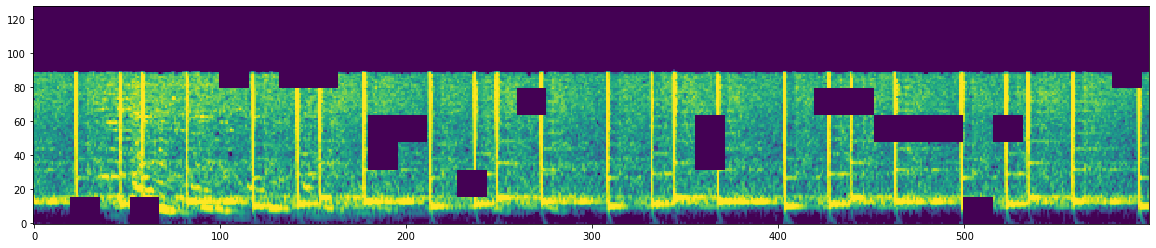

In [ ]:
display_fbank(im_masked2[0][start:end].squeeze(),minmin=minmin, maxmax=maxmax)

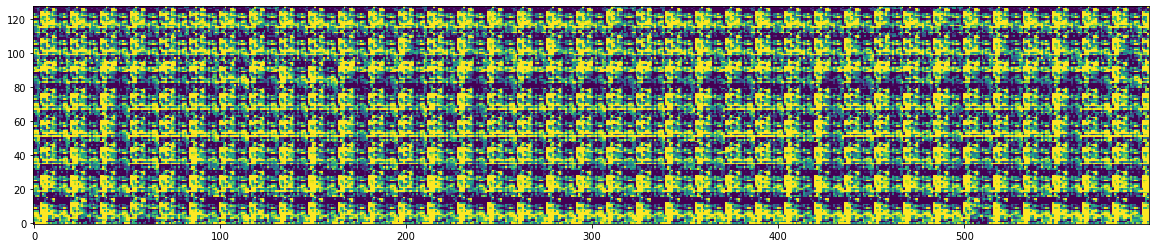

In [ ]:
display_fbank((y[0][start:end]).squeeze(), minmin=minmin, maxmax=maxmax)

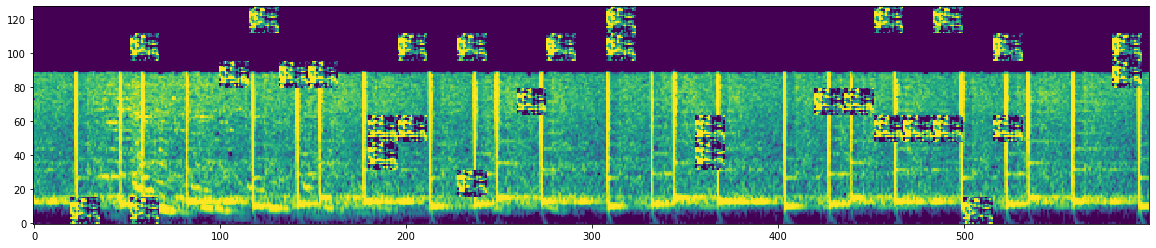

In [ ]:
display_fbank(im_paste[0][start:end].squeeze(),minmin=minmin, maxmax=maxmax)

In [ ]:
# MAE reconstruction pasted with visible patches
im_paste = x * (1 - mask) + y * mask

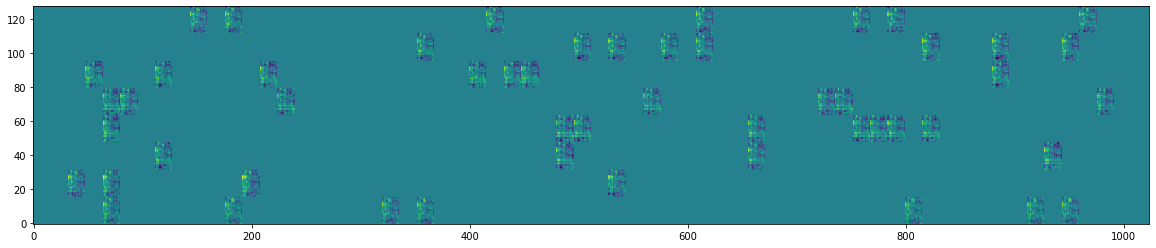

In [ ]:
display_fbank((y * mask - 999).squeeze())